# Naive Bayes

Algoritma **Naive Bayes** adalah metode yang menggunakan prinsip *probability* untuk membuat model prediksi klasifikasi. Dengan memanfaatkan data tentang kejadian di masa lalu, model bisa membuat perkiraan apa yang akan terjadi di masa depan. Metode ini menghitung *probability* suatu kejadian, dan bisa berubah bila ada informasi pendukung tambahan yang disediakan.

![weather_predict](https://t3.ftcdn.net/jpg/04/46/40/38/360_F_446403857_lPPoTW7uIXfkwzMXbpbMIWwOsNwY4oAl.jpg)

Salah satu contoh penerapannya adalah dalam bidang peramalan cuaca. Dalam mengukur kemungkinan turunnya hujan, para ahli meteorologi menggunakan data pengukuran terkait atmosfir bumi (tekanan udara, suhu, kecepatan angin, gumpalan awan, dan sebagainya) saat terjadi hujan di masa lalu. 

Ketika membuka aplikasi ramalan cuaca di *smartphone* kalian, kalian akan melihat suatu angka misalnya "70%" di samping gambar awan dan hujan. *Probability 70%* artinya hujan terbukti turun di suatu wilayah dalam 8 dari 10 kasus di masa lalu, yaitu saat angka-angka atmosfirnya serupa atau hampir sama.

Keunggulan Naive Bayes adalah sifatnya efektif dan cepat untuk mengolah data berjumlah besar. Karena kelebihannya itu, Naive Bayes biasa digunakan di aplikasi seperti *spam filtering* dan deteksi anomali di jaringan komputer. Algoritma Naive Bayes bahkan dianggap sebagai standar *de facto* untuk penerapan klasifikasi teks, misalnya *sentimen analysis* (menentukan apakah penulis suatu komentar bernada positif, negatif, atau netral).

---

## Bagaimana Naive Bayes bekerja?

Naive Bayes adalah sekumpulan algoritma klasifikasi yang dibangun berdasarkan **Teorema Bayes (Aturan Bayes)**. Semua algoritma di bawah payung Naive Bayes pada prinsipnya menghitung seberapa tinggi kemungkinan satu example dalam suatu observasi masuk ke suatu kelompok ("kelas") tertentu. Model klasifikasi yang memakai metode Bayes memanfaatkan *training dataset* untuk menghitung kemungkinan setiap kelas berdasarkan nilai-nilai feature di dalamnya. Ketika model dihadapkan pada data baru, *feature* baru akan dipakai untuk menghitung kelas mana yang kemungkinannya tertinggi.

Dalam ilmu statistik, Teorema Bayes dipakai untuk menjelaskan apa yang disebut **conditional probability**, yaitu kemungkinan munculnya suatu kejadian A bila suatu kejadian B muncul.

![Teori_bayes](https://miro.medium.com/v2/resize:fit:792/1*VwvtCnwVnX71iMgHTrBRJQ.png)

Mengapa Naive Bayes disebut "naive" karena semua *feature* di dalam data dianggap setara pentingnya dan tidak punya ketergantungan satu sama lain. Meskipun prinsipnya sederhana, Naive Bayes bisa menjadi algoritma yang menghasilkan model prediksi yang mengalahkan algoritma lain yang lebih rumit.

---

## Study Case 1

Sebagai contoh kasus untuk mendemostrasikan algoritma Naive Bayes, akan dicoba membangun sebuah model klasifikasi sederhana dengan menggunakan dataset "Titanic". Berdasarkan informasi yang terdapat di dalam dataset ini, akan dicoba membuat model prediksi apakah seorang penumpang kapal Titanic akan selamat atau tidak dalam kecelakaan tragis ini.

In [21]:
import pandas as pd
df_train = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch7/titanic_train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preprocessing

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
# Cek nilai null
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Drop feature cabin
df_train.drop(['Cabin'], axis=1, inplace=True)

In [29]:
# Cek mayoritas penumpang berangkat dari pelabuhan mana
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df_train['Embarked'].fillna('S', inplace=True)

In [33]:
# Mengubah feature Embarked ke numerik
embarked = {"Embarked":{"S":0,"C":1,"Q":2}}
df_train.replace(embarked, inplace=True)

In [35]:
# Drop data age yang null
df_train.dropna(inplace=True, how='any')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,2
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,1


In [36]:
# Mengubah tipe float ke integer
df_train['Fare'] = df_train['Fare'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

In [38]:
# Menghapus feature 
df_train = df_train.drop(['PassengerId','Name','Ticket'],axis=1)

In [41]:
# Mengubah feature Sex ke numerik
sex = {"Sex": {"male":0, "female":1}}
df_train.replace(sex, inplace=True)

In [42]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39,0,5,29,2
886,0,2,0,27,0,0,13,0
887,1,1,1,19,0,0,30,0
889,1,1,0,26,0,0,30,1


## Splitting Dataset

In [43]:
import sklearn.model_selection as ms

In [92]:
# Split feature dan label
features = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

label = df_train['Survived']

In [111]:
X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size=0.2,random_state=0)

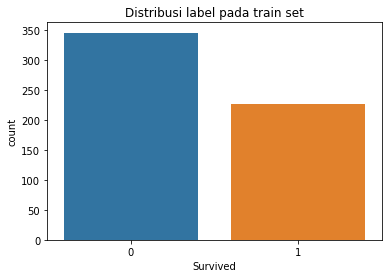

In [112]:
# Cek distribusi label pada train set
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train, data=y_train)
plt.title("Distribusi label pada train set")
plt.show()

## Modelling

Untuk kasus yang melibatkan banyak *feature* bersifat *continuous*, akan digunakan modul Gaussian Naive Bayes yang disediakan oleh Scikitlearn.

In [113]:
# Import modul gaussianNB dan panggil fungsi fit() untuk menjalankan proses training

import sklearn.naive_bayes as nb
import sklearn.metrics as met

gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [114]:
# Ukur akurasi dan presisi dengan bantuan modul sklearn.metrics

y_prediksi = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)

print('Accuracy=', accuracy)
print('Precision=', precision)

Accuracy= 0.7762237762237763
Precision= 0.7424242424242424


## Meningkatkan Unjuk Kerja Model

In [61]:
dftrain = pd.read_csv("/Users/Won/Library/CloudStorage/OneDrive-UGM365/Self-course/Data Mining/intro to ML Book/ch7/titanic_train.csv")
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [62]:
dftrain = dftrain.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

sex = {"Sex": {"male":0, "female":1}}
dftrain.replace(sex, inplace=True)

dftrain['Embarked'].fillna('S', inplace=True)
embarked = {"Embarked":{"S":0,"C":1,"Q":2}}
dftrain.replace(embarked, inplace=True)

dftrain.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,NaN,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


In [67]:
dftrain['Age'].isnull().sum()

177

In [71]:
# Ganti null value di feature Age ke sesuatu yang bermakna

# Isikan dengan rata-rata umur sesuai jenis kelaminnya

male = dftrain['Age'].loc[dftrain['Sex']==0].mean(0)
female = dftrain['Age'].loc[dftrain['Sex']==1].mean(0)

print('Rata-rata umur penumpang pria adalah ', male)
print('Rata-rata umur penumpang wanita adalah ', female)

Rata-rata umur penumpang pria adalah  30.72664459161148
Rata-rata umur penumpang wanita adalah  27.915708812260537


In [72]:
dftrain['Age'].loc[(dftrain['Sex']==0)&(dftrain['Age'].isnull()==True)] = 30.727
dftrain['Age'].loc[(dftrain['Sex']==1)&(dftrain['Age'].isnull()==True)] = 27.916

/var/folders/zs/b4sprz055_n3psl6l74kw2wc0000gp/T/ipykernel_1495/3679624701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Age'].loc[(dftrain['Sex']==0)&(dftrain['Age'].isnull()==True)] = 30.727
/var/folders/zs/b4sprz055_n3psl6l74kw2wc0000gp/T/ipykernel_1495/3679624701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Age'].loc[(dftrain['Sex']==1)&(dftrain['Age'].isnull()==True)] = 27.916


<AxesSubplot:>

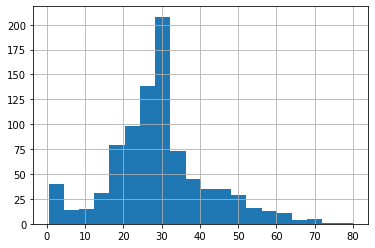

In [76]:
# Sebaran data usia penumpang

dftrain['Age'].hist(bins=20)

<AxesSubplot:>

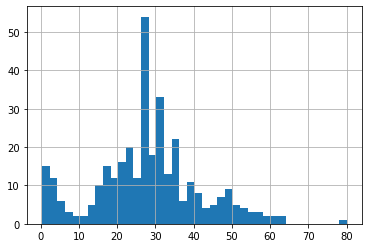

In [81]:
dftrain['Age'].loc[dftrain['Survived']==1].hist(bins=40)

In [80]:
# Lakukan proses binning pada feature Age

umur =[0,5,15,25,30,35,45,50,200]
umur_label = ['0-5','5-15','15-25','25-30','30-35','35-45','45-50','>50']
kelompok_umur= pd.cut(dftrain['Age'],umur,labels=umur_label)

dftrain['KelompokUmur']= kelompok_umur
dftrain['KelompokUmurCode']= dftrain['KelompokUmur'].cat.codes
dftrain['KelompokUmur'].value_counts()

15-25    218
30-35    212
25-30    161
35-45    114
>50       64
0-5       44
5-15      39
45-50     39
Name: KelompokUmur, dtype: int64

<AxesSubplot:>

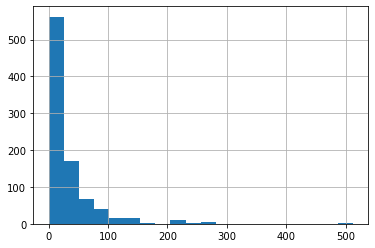

In [83]:
dftrain['Fare'].hist(bins=20)

In [84]:
# Lakukan proses binning pada feature Fare
harga =[0,10,30,35,80,1000]
harga_label = ['0-10','10-30','30-35','35-80','>80']
kelompok_harga= pd.cut(dftrain['Fare'],harga,labels=harga_label)

dftrain['KelompokHarga']= kelompok_harga
dftrain['KelompokHargaCode']= dftrain['KelompokHarga'].cat.codes
dftrain['KelompokHarga'].value_counts()

0-10     321
10-30    321
35-80    124
>80       74
30-35     36
Name: KelompokHarga, dtype: int64

In [85]:
jumlahOrang = dftrain['SibSp'].astype(int) + dftrain['Parch'].astype(int) + 1

dftrain['JumlahOrang'] = jumlahOrang.astype(int)

In [119]:
dftrain

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,KelompokUmur,KelompokUmurCode,KelompokHarga,KelompokHargaCode,JumlahOrang
0,0,3,0,22.000,1,0,7.2500,0,15-25,2,0-10,0,2
1,1,1,1,38.000,1,0,71.2833,1,35-45,5,35-80,3,2
2,1,3,1,26.000,0,0,7.9250,0,25-30,3,0-10,0,1
3,1,1,1,35.000,1,0,53.1000,0,30-35,4,35-80,3,2
4,0,3,0,35.000,0,0,8.0500,0,30-35,4,0-10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000,0,0,13.0000,0,25-30,3,10-30,1,1
887,1,1,1,19.000,0,0,30.0000,0,15-25,2,10-30,1,1
888,0,3,1,27.916,1,2,23.4500,0,25-30,3,10-30,1,4
889,1,1,0,26.000,0,0,30.0000,1,25-30,3,10-30,1,1


In [120]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Survived           891 non-null    int64   
 1   Pclass             891 non-null    int64   
 2   Sex                891 non-null    int64   
 3   Age                891 non-null    float64 
 4   SibSp              891 non-null    int64   
 5   Parch              891 non-null    int64   
 6   Fare               891 non-null    float64 
 7   Embarked           891 non-null    int64   
 8   KelompokUmur       891 non-null    category
 9   KelompokUmurCode   891 non-null    int8    
 10  KelompokHarga      876 non-null    category
 11  KelompokHargaCode  891 non-null    int8    
 12  JumlahOrang        891 non-null    int64   
dtypes: category(2), float64(2), int64(7), int8(2)
memory usage: 66.8 KB


In [117]:
features1 = dftrain[['Pclass','Sex','Embarked','KelompokUmurCode','KelompokHargaCode','JumlahOrang']]

label1 = dftrain['Survived']

X_train1, X_test1, y_train1, y_test1 = ms.train_test_split(features1, label1, test_size=0.2,random_state=0)

In [118]:
# import sklearn.naive_bayes as nb
# import sklearn.metrics as met

gnb = nb.GaussianNB()
gnb.fit(X_train1, y_train1)

y_prediksi1 = gnb.predict(X_test1)
accuracy1 = met.accuracy_score(y_test1, y_prediksi1)
precision1 = met.precision_score(y_test1, y_prediksi1)

print('Accuracy=', accuracy1)
print('Precision=', precision1)

Accuracy= 0.8324022346368715
Precision= 0.76
